<a href="https://colab.research.google.com/github/Love1117/Machine_learning-Projects/blob/main/Machine_Learning%20Project/01_Supervised-%20Machine%20Learning/02_Unsupervised%20-%20Machine%20Learning/K-Means%20Clustering/Cluster%20customer%20spending%20habit(segmentation)/Customer_spending_habit1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

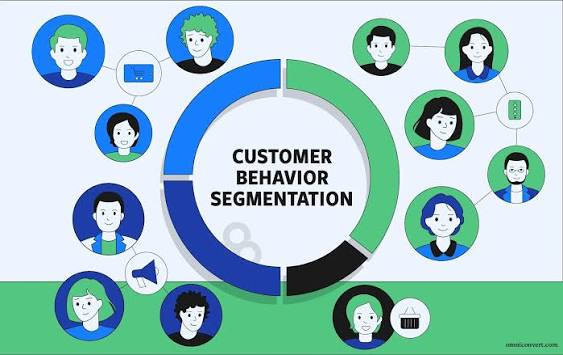
#**🧾 Project Title:**
#**Cstomer Spending Habit Prediction using K-Means Clustering**


**Project Overview**

This project aims to segment customers based on their demographic and behavioral characteristics to better understand their spending habits. Using the K-Means clustering algorithm, customers were grouped into seven distinct segments according to features such as age, marital status, profession, education level, work experience, graduated, family size and spending score.

Several clustering techniques were explored, including Hierarchical Clustering and DBSCAN, but K-Means produced the most stable and interpretable clusters. Principal Component Analysis (PCA) was also applied to reduce the dimensionality of the data, enabling clear visualization of the customer segments in a 2-D space.


**Data Loading and exploration**

In [452]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Test.csv")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [453]:
# confirming if my data has missing or null values
print(f"Null Values: {df.isna().sum()}")
print("\n")
print(f"Duplicate Values: {df.duplicated().sum()}")

Null Values: ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64


Duplicate Values: 0


In [454]:
#drop duplicates
df.dropna(inplace=True)

**Feature Engineering**

In [455]:
#copying dataset to df1
df1 = df.copy()

df1.replace({"Yes":1, "No":0}, inplace=True)
df1["Gender"] = df1["Gender"].map({"Female":0, "Male":1})
df1["Spending_Score"] = df1["Spending_Score"].map({"Low":0, "Average":1, "High":2})

#Freq encode
freq = df1["Var_1"].value_counts().to_dict()
#creating columns for my frequency encode features.
df1["val_1 freq-encode"] = df1["Var_1"].map(freq)


#onehotencoding
df1 = pd.get_dummies(df1, drop_first=True, columns=["Profession"], dtype=int)
df1 = df1.drop(columns=["ID","Var_1"])
df1.head()

/tmp/ipython-input-1841631030.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace({"Yes":1, "No":0}, inplace=True)


,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,val_1 freq-encode,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,0,1,36,1,0.0,0,1.0,1421,0,1,0,0,0,0,0,0
1,1,1,37,1,8.0,1,4.0,1421,0,0,0,0,1,0,0,0
3,1,1,59,0,11.0,2,2.0,1421,0,0,0,1,0,0,0,0
5,1,1,47,1,0.0,2,5.0,320,1,0,0,0,0,0,0,0
6,1,1,61,1,5.0,0,3.0,1421,1,0,0,0,0,0,0,0


**Scaling features using MinMaxScaler**

In [456]:
from sklearn.preprocessing import MinMaxScaler
scaled_df = pd.DataFrame(MinMaxScaler().fit_transform(df1), columns=df1.columns)
scaled_df

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,val_1 freq-encode,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,0.0,1.0,0.253521,1.0,0.000000,0.0,0.000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.267606,1.0,0.571429,0.5,0.375,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.577465,0.0,0.785714,1.0,0.125,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.408451,1.0,0.000000,1.0,0.500,0.212446,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.605634,1.0,0.357143,0.0,0.250,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149,0.0,0.0,0.239437,1.0,0.071429,0.0,0.125,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2150,1.0,0.0,0.154930,0.0,0.642857,0.0,0.375,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2151,0.0,0.0,0.239437,1.0,0.071429,0.0,0.000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2152,1.0,1.0,0.408451,1.0,0.071429,1.0,0.500,0.212446,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Checking to see which clustering model score performance.**

In [457]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

def view(Algorithm, n_clusters=None, **kwargs):
  if n_clusters:
      model = Algorithm(n_clusters=n_clusters, **kwargs)
  else:
      model = Algorithm(**kwargs)
  model.fit(scaled_df)
  if len(set(model.labels_)) <= 1:
    print(f"{Algorithm.__name__} is not >1")
  else:
    score = silhouette_score(scaled_df, model.labels_)
    print(f"{Algorithm.__name__} silhouette score is : {score}")

view(KMeans, n_clusters=7)
view(DBSCAN, eps=0.5, min_samples=5) # Adjusted parameters for DBSCAN
view(AgglomerativeClustering, n_clusters=7)

KMeans silhouette score is : 0.19536862741951658
DBSCAN silhouette score is : 0.3815110732728455
AgglomerativeClustering silhouette score is : 0.192480382193041


**Modeling:** Applied K-Means with multiple values of k to determine the optimal number of clusters using the Elbow and Silhouette methods.

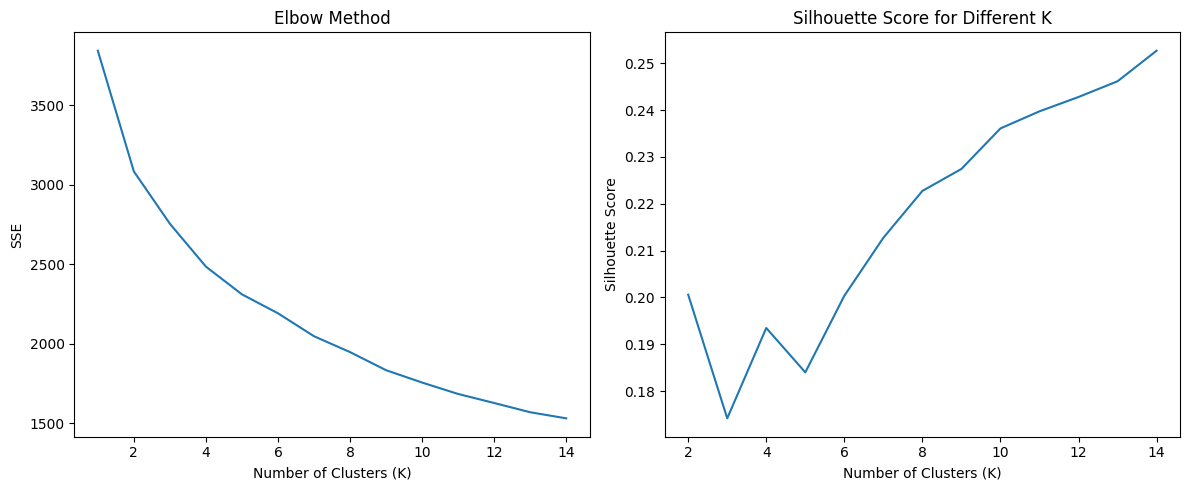

In [458]:
sse = []
silhouette = []

k_range = range(1,15)
for k in k_range:
  kmeans = KMeans(n_clusters=k, init="k-means++", n_init=19, random_state=42)
  kmeans.fit(scaled_df)
  sse.append(kmeans.inertia_)
  if k > 1: # Calculate silhouette score only for k > 1
    silhouette.append(silhouette_score(scaled_df, kmeans.labels_))
  else:
    silhouette.append(np.nan) # Append NaN for k=1 where silhouette score is not defined


import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.plot(k_range, sse)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("SSE")
plt.title("Elbow Method")

plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.plot(k_range, silhouette)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different K")

plt.tight_layout() # Adjust layout
plt.show()

**Dimensionality Reduction:** Used PCA for better visualization and understanding of customer groupings.


In [459]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(scaled_df), columns=["principal component 1", "principal component 2"])
pca_df

,principal component 1,principal component 2
0,0.333774,-0.763030
1,0.263258,0.386907
2,0.606947,0.833795
3,0.663037,0.356354
4,0.482196,0.166626
...,...,...
2149,-0.314274,-0.665089
2150,-1.007149,0.621504
2151,-0.341524,-0.805465
2152,0.782235,0.532713


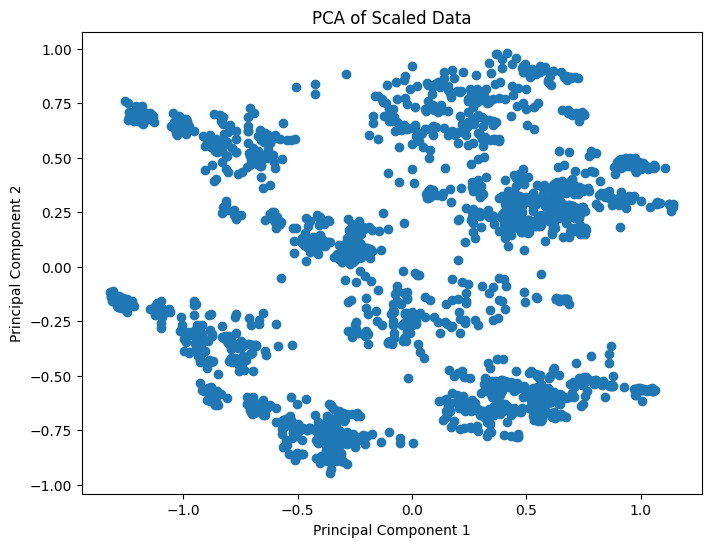

In [460]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df["principal component 1"], pca_df["principal component 2"])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Scaled Data")
plt.show()

Formed 7 distinct customer groups with clearly defined spending behavior patterns.

K-Means delivered the best separation and consistency among clusters compared to other models.

Insights from the clusters can guide marketing strategies, product personalization, and customer retention efforts.


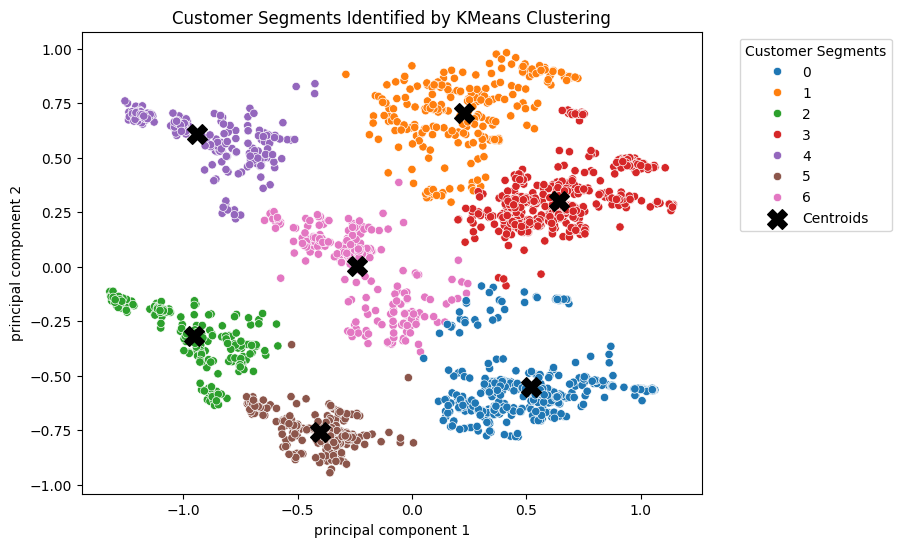

In [461]:
Kmeans = KMeans(7, init="k-means++", n_init=29, random_state=21)
pca_df["cluster"] = Kmeans.fit_predict(pca_df)

import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
        x='principal component 1',
            y='principal component 2',
                hue=pca_df['cluster'],
                    palette='tab10'
                    )
centroids = Kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='black', label='Centroids')
plt.legend(title='Customer Segments', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Customer Segments Identified by KMeans Clustering")
plt.show()

In [462]:
df["cluster"] = Kmeans.fit_predict(pca_df)
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,cluster
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,3
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,1
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,1
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4,0
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6,0
...,...,...,...,...,...,...,...,...,...,...,...
2621,467950,Female,No,35,Yes,Entertainment,1.0,Low,2.0,Cat_6,2
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,4
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,2
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,0


In [463]:
#assign clusters to scaled_df which can be later used for supervised machine learning
scaled_df["cluster"] = Kmeans.fit_predict(pca_df)
scaled_df


,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,val_1 freq-encode,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,cluster
0,0.0,1.0,0.253521,1.0,0.000000,0.0,0.000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,1.0,1.0,0.267606,1.0,0.571429,0.5,0.375,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,1.0,1.0,0.577465,0.0,0.785714,1.0,0.125,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,1.0,1.0,0.408451,1.0,0.000000,1.0,0.500,0.212446,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.0,1.0,0.605634,1.0,0.357143,0.0,0.250,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149,0.0,0.0,0.239437,1.0,0.071429,0.0,0.125,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
2150,1.0,0.0,0.154930,0.0,0.642857,0.0,0.375,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4
2151,0.0,0.0,0.239437,1.0,0.071429,0.0,0.000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2152,1.0,1.0,0.408451,1.0,0.071429,1.0,0.500,0.212446,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


**Conclusion**

When deployed, this model can be used to automatically segment new or existing customers into meaningful groups based on their characteristics and spending habits. Businesses can then leverage these insights to:

•Target customers with personalized marketing campaigns,

•Develop data-driven pricing or loyalty strategies, and

•Improve customer satisfaction and retention through tailored services.

In essence, this project demonstrates how unsupervised learning can reveal hidden patterns in consumer behavior, helping businesses make smarter, customer-centric decisions.
**